<a href="https://colab.research.google.com/github/aarushiramesh/Forecasting_Power/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Training: Forecasting Electricity Demand**

* df_new is the dataset from South Central (with Austin weather data)
* df_new1 is the dataset from North Central (with Dallas weather data)
* df_new2 is the dataset from Coastal region (with Houston weather data).

In [409]:
cd '/content/drive/Shareddrives/Data Science Project/data'

/content/drive/Shareddrives/Data Science Project/data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls

drive/  sample_data/


In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## **South Central/Austin Region**

In [410]:
df = pd.read_csv('df.csv')

In [ ]:
df

In [412]:
df = df[['Date', 'TempAvgF', 'WindAvgMPH', 'PrecipiationTotalInches', 'Year', 'Month', 'Day', 'Population', 'SCENT']]

In [413]:
df = df.rename(columns={'SCENT': 'SCENTTotalElectricityinMWPH'})

In [414]:
df = df.drop(columns=['Date'])

In [ ]:
df

In [417]:
df = df[['Year', 'Month', 'Day', 'TempAvgF', 'WindAvgMPH', 'PrecipiationTotalInches', 'Population', 'SCENTTotalElectricityinMWPH']]

In [ ]:
df

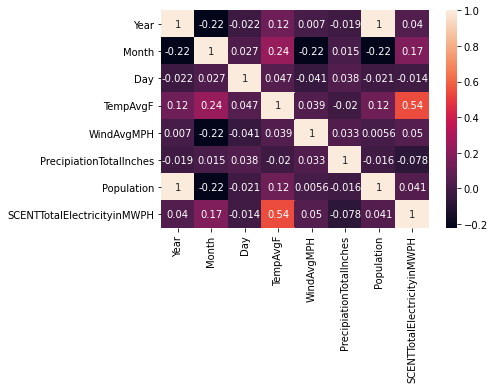

In [419]:
sn.heatmap(df.corr(), annot=True)

## **North Central/Dallas Region**

In [444]:
cd '/content/drive/Shareddrives/Data Science Project/data'

/content/drive/Shareddrives/Data Science Project/data


In [421]:
cd 'dallas_weather'

/content/drive/Shareddrives/Data Science Project/data/dallas_weather


In [422]:
ls

dallas_weather_2000tomarch2021.csv  dallas_weather_april2021.csv


In [423]:
dallas_weather = pd.read_csv('dallas_weather_2000tomarch2021.csv')

In [433]:
prcp = dallas_weather['PRCP']

In [429]:
df_dallas = pd.read_csv('ercot_combined.csv')

In [430]:
df_dallas = df_dallas[['Year', 'Month', 'Day', 'NCENT']]

In [431]:
df_dallas = df_dallas[0:75465]

In [434]:
df_dallas['PrecipitationTotalInches'] = prcp

In [436]:
df_dallas = df_dallas[['Year', 'Month', 'Day', 'PrecipitationTotalInches', 'NCENT']]

In [437]:
df_new1 = df_dallas

In [438]:
df_new1 = df_new1.fillna(0)

In [439]:
df_new1.to_csv('dallas_dataframe.csv')

In [440]:
ls

 austin_weather/                        ercot_hourly/
 AustinWeather_1Jan2010_30Apr2021.csv   houston_weather/
 Austin_Weather.csv                     lubbock_weather/
 collegestation_weather/                manual_pop.csv
 cost/                                  merge_all_data.ipynb
 cost_features_cleaned.csv              pop_features_cleaned.csv
 dallas_dataframe.csv                   population/
 dallas_weather/                        Regressor.ipynb
 df.csv                                 Weather_Austin_info.ipynb
 df.gsheet                              Weather_Data_Austin_temp.ipynb
 ercot_combined.csv                    'WeatherData (non-updated)'/


## **Coastal Region, Houston data**

In [441]:
cd '/content/drive/Shareddrives/Data Science Project/data'

/content/drive/Shareddrives/Data Science Project/data


In [272]:
ls

 austin_weather/                        houston_weather/
 AustinWeather_1Jan2010_30Apr2021.csv   lubbock_weather/
 Austin_Weather.csv                     manual_pop.csv
 collegestation_weather/                merge_all_data.ipynb
 cost/                                  pop_features_cleaned.csv
 cost_features_cleaned.csv              population/
 dallas_weather/                        Regressor.ipynb
 df.csv                                 Weather_Austin_info.ipynb
 df.gsheet                              Weather_Data_Austin_temp.ipynb
 ercot_combined.csv                    'WeatherData (non-updated)'/
 ercot_hourly/


In [442]:
cd 'houston_weather/'

/content/drive/Shareddrives/Data Science Project/data/houston_weather


In [445]:
df_ercot = pd.read_csv('ercot_combined.csv')

In [306]:
df_ercot

,Unnamed: 0,Year,Month,Day,Time,Date,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,8735,2002,12,31,00:00:00,12/31/2002,7465.108600,934.337680,1023.925140,834.789600,7311.082400,1905.105800,3744.193820,726.417570,23944.960610
1,2886,2002,5,1,07:59:59.997000,05/01/2002,9292.072328,1284.066414,1120.529817,1019.822219,11639.263205,2366.664224,5161.428563,831.237731,32715.084501
2,2887,2002,5,1,09:00:00,05/01/2002,9379.199031,1322.707228,1169.862610,1060.145416,12100.144180,2448.898405,5219.559143,872.733475,33573.249488
3,2888,2002,5,1,10:00:00.003000,05/01/2002,9835.573198,1387.184064,1228.546453,1128.049654,12849.761626,2565.037919,5529.945543,937.479422,35461.577880
4,2889,2002,5,1,10:59:59.997000,05/01/2002,10456.739916,1478.026056,1282.154211,1210.093869,13855.505612,2706.770506,5880.871126,1003.004371,37873.165666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168714,1442,2021,3,2,03:00,03/02/2021,8660.283443,1342.191539,3570.271491,709.512667,10682.733963,2502.029526,5565.379531,1176.590418,34208.992577
168715,1443,2021,3,2,04:00,03/02/2021,8687.156195,1355.351817,3581.461247,720.515007,10874.013581,2500.370178,5660.120212,1199.643334,34578.631572
168716,1444,2021,3,2,05:00,03/02/2021,8920.723467,1410.460122,3599.008463,750.069923,11458.052709,2547.677158,5903.217849,1246.204695,35835.414386
168717,1430,2021,3,1,15:00,03/01/2021,10437.689560,1558.684949,3435.625725,728.404971,12607.138170,2938.918791,6268.638184,1126.746986,39101.847336


In [446]:
df_ercot = df_ercot[['Year', 'Month', 'Day','COAST']]

In [447]:
df_ercot = df_ercot.loc[df_ercot['Year'] <= 2016]

In [448]:
df_ercot = df_ercot.loc[df_ercot['Year'] >= 2013]

In [450]:
cd houston_weather/

/content/drive/Shareddrives/Data Science Project/data/houston_weather


In [451]:
df_houston = pd.read_csv('houston_weather_2013to2016.csv')

In [452]:
df_houston = df_houston[0:35064]

In [453]:
df_ercot['PrecipitationTotalInches'] = df_houston[['PRCP']]

In [454]:
df = df_ercot.fillna(0)

In [455]:
df_new2 = df

In [456]:
df_new2 = df_new2[['Year', 'Month', 'Day', 'PrecipitationTotalInches', 'COAST']]

In [457]:
df_new2.to_csv('houston_dataframe.csv')

## **Data Preprocessing**

In [325]:
# Standardize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_new = scaler.fit_transform(df)

In [326]:
df_transformed = pd.DataFrame(df_new)

In [217]:
df_transformed = df_transformed.rename(columns={0: "Year", 1:'Month', 2:'Day', 3:'TempAvgF', 4:'WindAvgMPH', 5:'PrecipiationTotalInches', 6: 'Population', 7: 'SCENTTotalElectricityinMWPH'})

In [327]:
df_transformed

,0,1,2,3,4
0,0.0,0.363636,0.033333,0.0,0.455504
1,0.0,0.363636,0.033333,0.0,0.459797
2,0.0,0.363636,0.033333,0.0,0.480504
3,0.0,0.363636,0.033333,0.0,0.526934
4,0.0,0.363636,0.033333,0.0,0.497758
...,...,...,...,...,...
35059,1.0,0.727273,0.000000,0.0,0.534697
35060,1.0,0.727273,0.000000,0.0,0.556248
35061,1.0,0.727273,0.000000,0.0,0.584109
35062,1.0,0.727273,0.000000,0.0,0.628216


In [328]:
feature_vars = [0, 1, 2, 3]

X = df_transformed.loc[:, feature_vars].values
y = df_transformed.loc[:,[4]].values

In [329]:
# feature array
pd.DataFrame(X)

,0,1,2,3
0,0.0,0.363636,0.033333,0.0
1,0.0,0.363636,0.033333,0.0
2,0.0,0.363636,0.033333,0.0
3,0.0,0.363636,0.033333,0.0
4,0.0,0.363636,0.033333,0.0
...,...,...,...,...
35059,1.0,0.727273,0.000000,0.0
35060,1.0,0.727273,0.000000,0.0
35061,1.0,0.727273,0.000000,0.0
35062,1.0,0.727273,0.000000,0.0


In [330]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [331]:
# After completing dimensionality reduction
principalDf

,principal component 1,principal component 2
0,0.501149,0.174613
1,0.501149,0.174613
2,0.501149,0.174613
3,0.501149,0.174613
4,0.501149,0.174613
...,...,...
35059,-0.497513,-0.188593
35060,-0.497513,-0.188593
35061,-0.497513,-0.188593
35062,-0.497513,-0.188593


In [332]:
df_complete = pd.concat([principalDf, df_transformed[[4]]], axis = 1)

In [333]:
df_complete

,principal component 1,principal component 2,4
0,0.501149,0.174613,0.455504
1,0.501149,0.174613,0.459797
2,0.501149,0.174613,0.480504
3,0.501149,0.174613,0.526934
4,0.501149,0.174613,0.497758
...,...,...,...
35059,-0.497513,-0.188593,0.534697
35060,-0.497513,-0.188593,0.556248
35061,-0.497513,-0.188593,0.584109
35062,-0.497513,-0.188593,0.628216


## **Multi-Linear Regression**

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X = df_complete[['principal component 1', 'principal component 2']]

In [337]:
y = df_complete[[4]]

In [338]:
y

,4
0,0.455504
1,0.459797
2,0.480504
3,0.526934
4,0.497758
...,...
35059,0.534697
35060,0.556248
35061,0.584109
35062,0.628216


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [340]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [341]:
output = reg.predict(X_test)

In [342]:
reg.coef_

array([[-0.04597706, -0.06797207]])

In [343]:
reg.intercept_

array([0.56398246])

In [344]:
x_pred = np.linspace(0, 1, 200)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, 2)  # preprocessing required by scikit-learn functions

y_pred = reg.predict(x_pred)

In [345]:
x_pred.size

200

Text(0, 0.5, 'Predicted Normalized range of Kilowatt Hours')

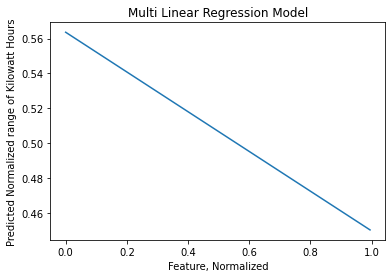

In [346]:
plt.plot(x_pred[:, 0], y_pred)
plt.title('Multi Linear Regression Model')
plt.xlabel('Feature, Normalized')
plt.ylabel('Predicted Normalized range of Kilowatt Hours')

In [386]:
# For calculating purposes
X_test['index'] = np.arange(11572)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [349]:
max(df['COAST'])

19928.724765915238

In [351]:
min(df['COAST'])

0.0

In [350]:
max(df['COAST']) - min(df['COAST'])

19928.724765915238

(array([  49.,  722., 1380., 1373., 1905., 2775., 3511., 2655., 1960.,
        1533., 1223., 1000.,  876.,  727.,  649.,  601.,  524.,  440.,
         351.,  237.,  191.,  129.,   54.,   31.,    8.]),
 array([-0.3105586 , -0.27292299, -0.23528739, -0.19765178, -0.16001617,
        -0.12238056, -0.08474495, -0.04710935, -0.00947374,  0.02816187,
         0.06579748,  0.10343308,  0.14106869,  0.1787043 ,  0.21633991,
         0.25397552,  0.29161112,  0.32924673,  0.36688234,  0.40451795,
         0.44215355,  0.47978916,  0.51742477,  0.55506038,  0.59269599,
         0.63033159]),
 <a list of 25 Patch objects>)

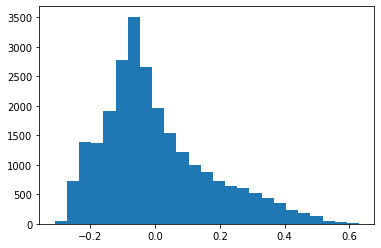

In [263]:
residual = (y_test.values-output)
plt.hist(residual, bins = 25)

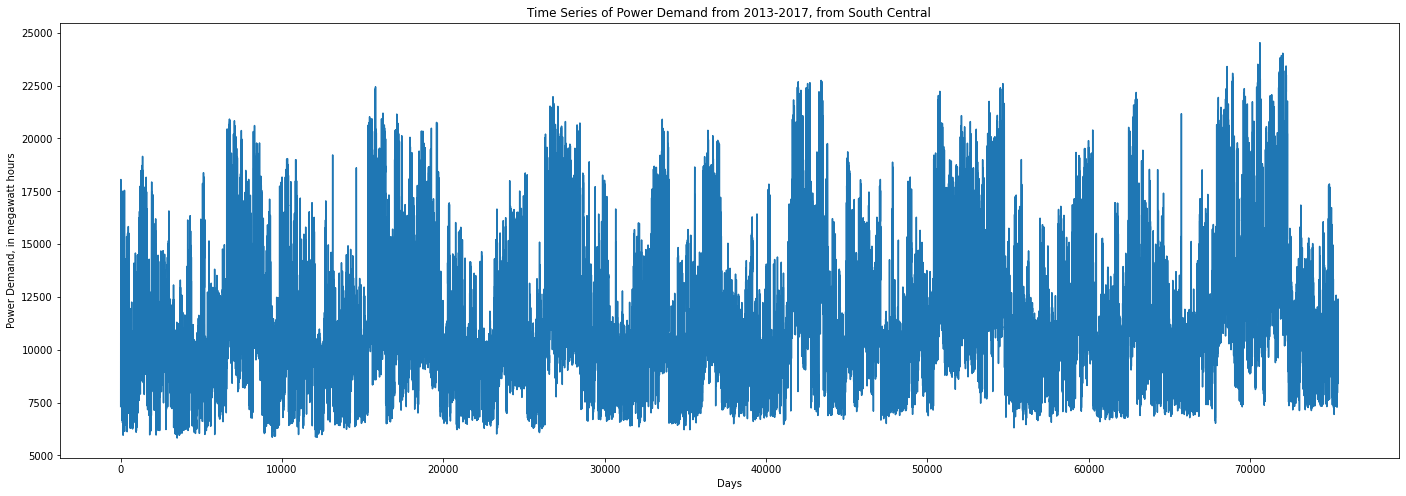

In [264]:
plt.figure(figsize=(24, 8))
plt.title('Time Series of Power Demand from 2013-2017, from South Central')
plt.xlabel('Days')
plt.ylabel('Power Demand, in megawatt hours')
plt.plot(df['NCENT'])

## **Polynomial Feature Scaling**

In [399]:
X_test = X_test.drop(columns='index')

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [401]:
def poly_transform(n):
    poly_obj = PolynomialFeatures(n)
    return poly_obj.fit_transform(X_train), poly_obj.fit_transform(X_test)

In [402]:
x_train1, x_test1 = poly(1)
x_train3, x_test3 = poly(3)
x_train5, x_test5 = poly(5)
x_train7, x_test7 = poly(7)
x_train9, x_test9  = poly(9)
x_train11, x_test11 = poly(11)

Score: 0.04543152414499219


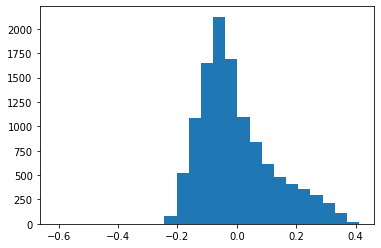

In [403]:
def ridge_plot(xr_train,xr_test):
    ridge = Ridge()
    ridge.fit(xr_train,y_train)
    y_pred = ridge.predict(xr_test)
    yt_pred = ridge.predict(xr_train)
    mse_test = mean_squared_error(y_test, y_pred)
    residual = (y_test.values-y_pred)
    plt.hist(residual, bins = 25)
    mse_train = mean_squared_error(y_train, yt_pred)
    print('Score:', ridge.score(xr_test, y_test))
    output = ridge.predict(xr_test)
    return mse_train, mse_test, output

mse_train1, mse_test1, preds = ridge_plot(x_train1,x_test1)

Score: 0.34313032795261655


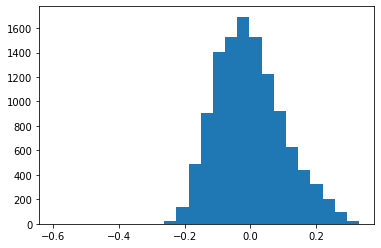

In [404]:
mse_train3, mse_test3, preds = ridge_plot(x_train3,x_test3)

In [408]:
preds

array([[0.52444059],
       [0.50892411],
       [0.56870561],
       ...,
       [0.61708628],
       [0.47289729],
       [0.40535173]])